In [55]:
import os 
BASE_DIR = os.getcwd().replace('/algo-apps/andraj-karpathy','')
DATA_DIR = os.path.join(BASE_DIR,'data')
APP_DIR = os.path.join(DATA_DIR,'karpathy')

In [56]:
with open(APP_DIR +'/names.txt') as names:
    words = [i.lower().strip() for i in names.readlines()]
    

In [57]:
words[:5]

['abhishek', 'aman', 'harsh', 'ayush', 'aditi']

In [58]:
min(len(i) for i in words)

2

In [59]:
max(len(i) for i in words)

14

In [75]:
torch.manual_seed(42)

In [76]:
unique_char = set(list("".join(words).lower()))
unique_char = ['.']+list(unique_char)

In [77]:
stoi = {char:i for i,char in enumerate(sorted(unique_char),0)}
itos = {j:i for i,j in stoi.items()}

In [78]:
import torch 
bg_matrix = torch.zeros((len(stoi),len(stoi)),dtype=torch.int32)
# bg_matrix

In [79]:

for word in words:
    word = ['.']+list(word)+['.']
    for char1,char2 in zip(word,word[1:]):
        bg_matrix[stoi[char1],stoi[char2]] = bg_matrix[stoi[char1],stoi[char2]].item() +1


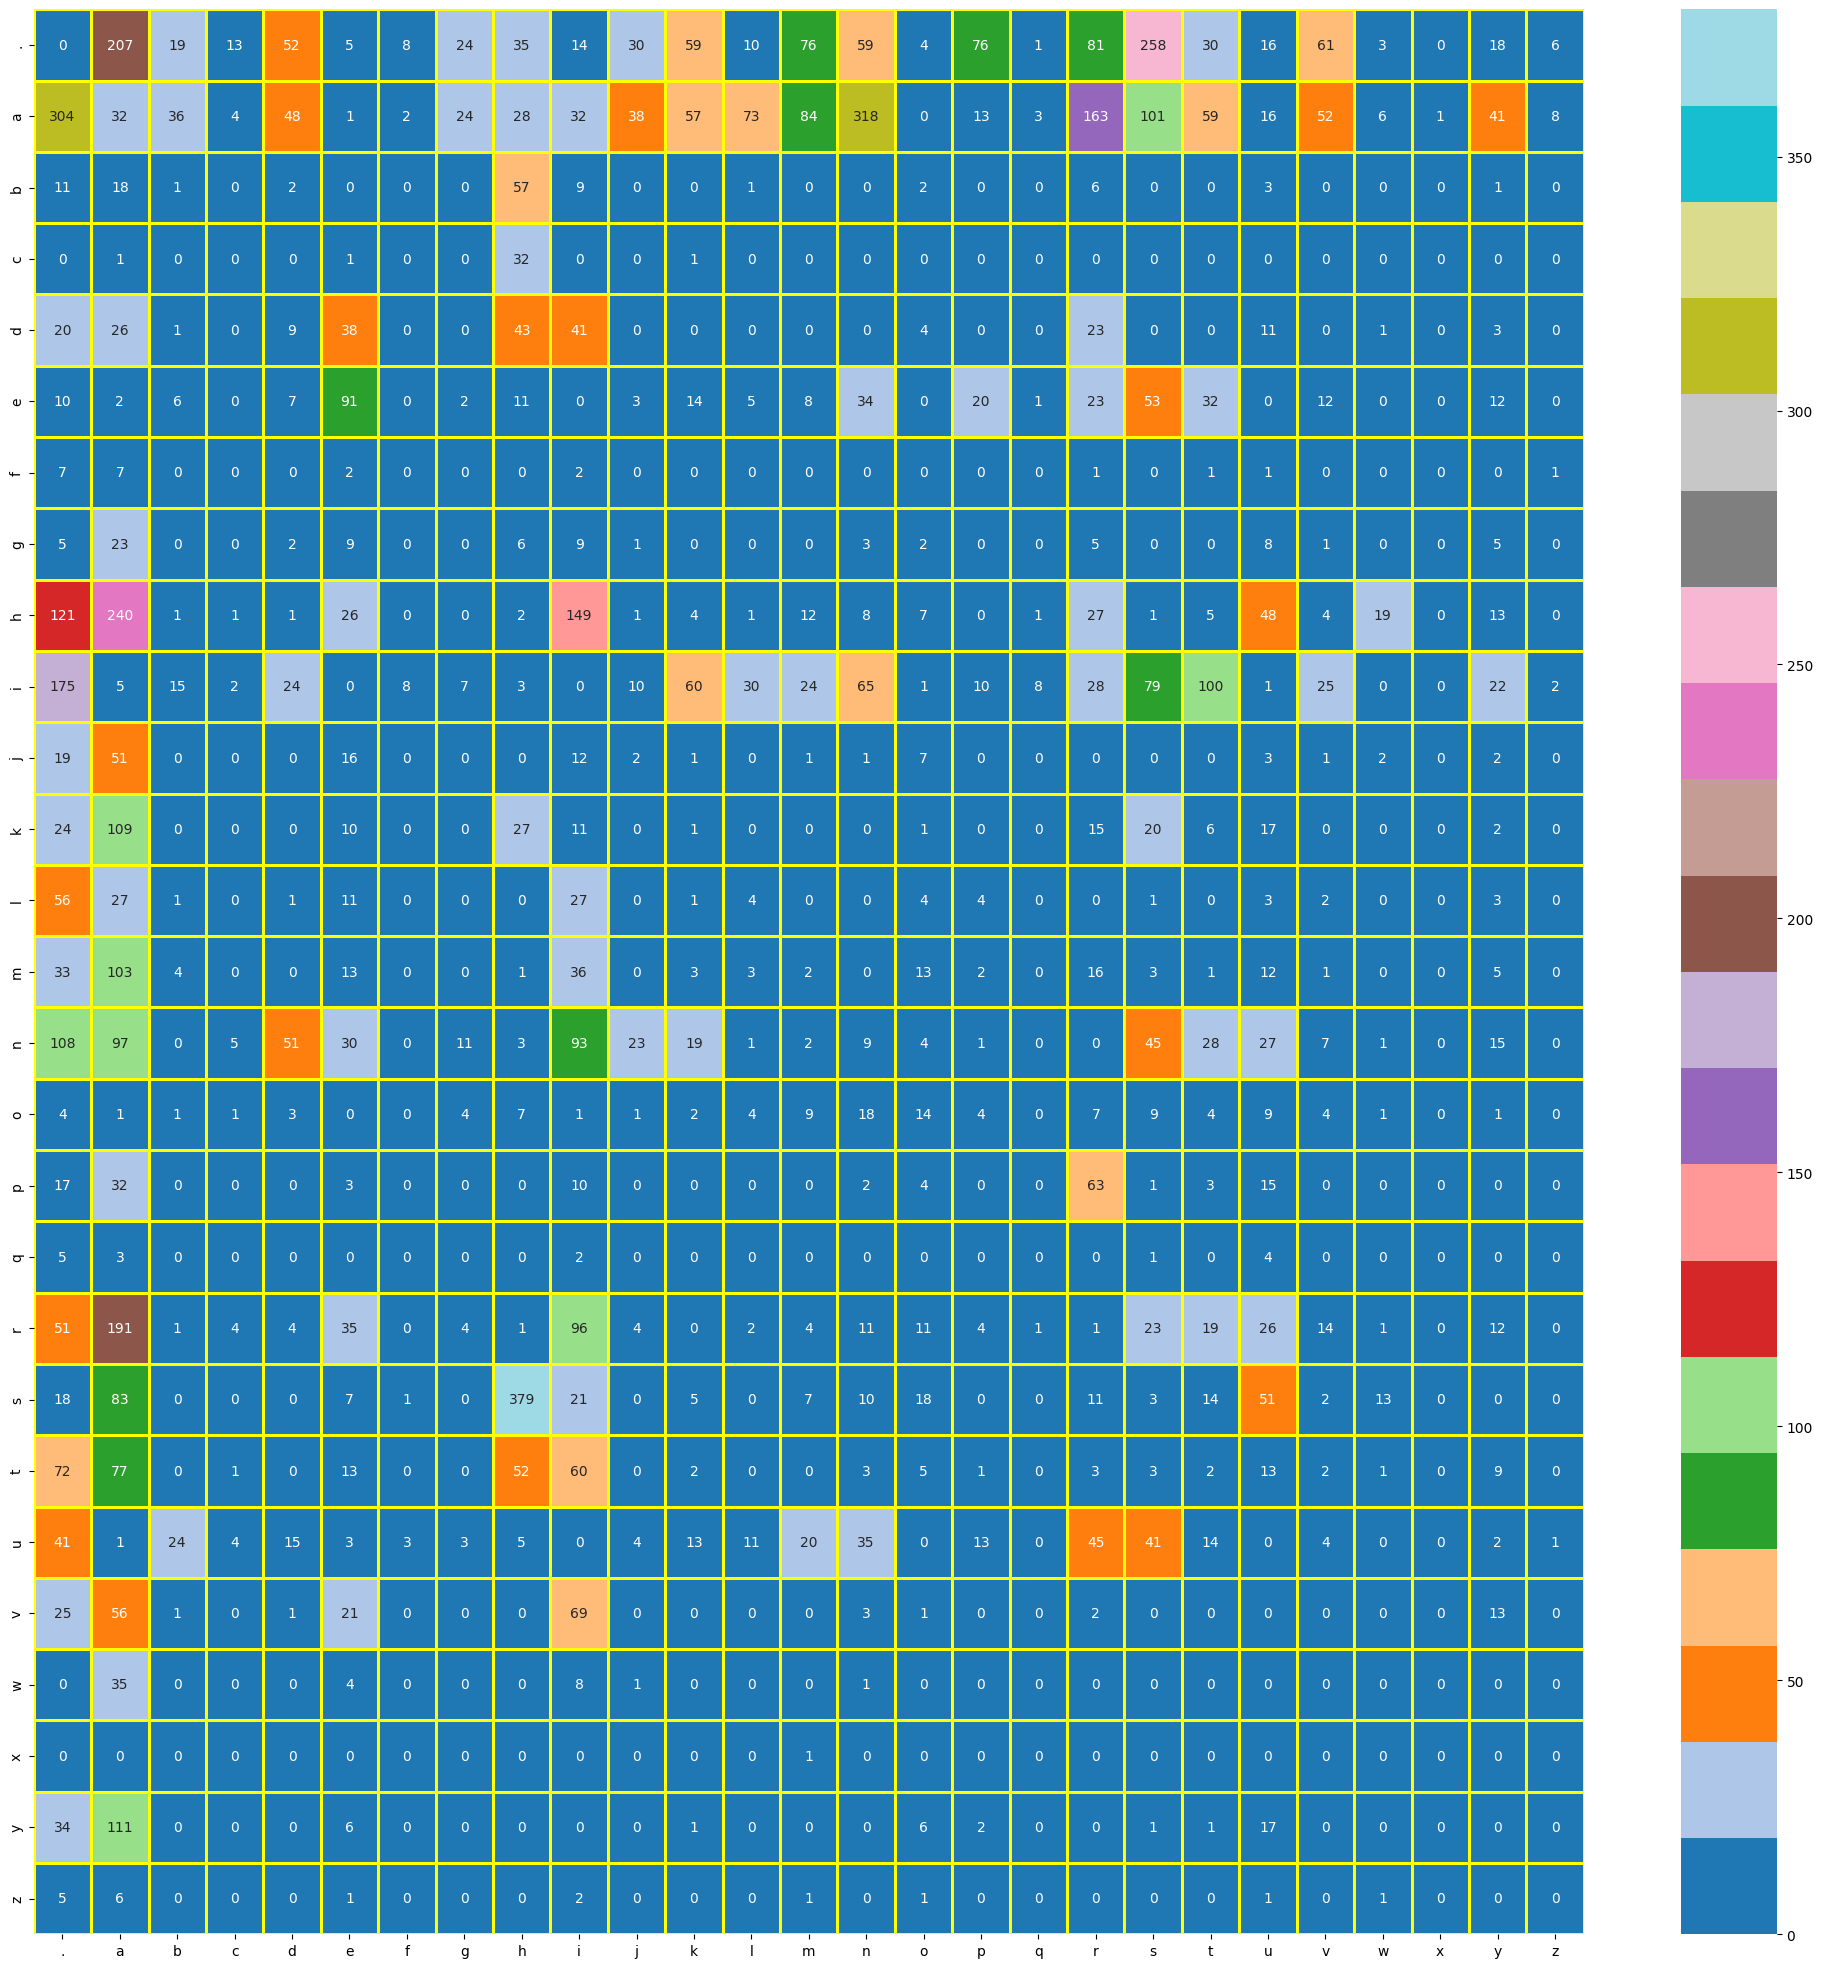

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(bg_matrix,xticklabels=stoi,yticklabels=stoi,annot=True,linewidths=1,linecolor='yellow',cmap='tab20',fmt='.0f');

In [81]:
# For performance boost 
bg_prob_mx = (bg_matrix+1).float()
bg_prob_mx /= bg_prob_mx.sum(axis=1,keepdims=True)

In [82]:
bg_prob_mx[0]

tensor([0.0008, 0.1745, 0.0168, 0.0117, 0.0445, 0.0050, 0.0076, 0.0210, 0.0302,
        0.0126, 0.0260, 0.0503, 0.0092, 0.0646, 0.0503, 0.0042, 0.0646, 0.0017,
        0.0688, 0.2173, 0.0260, 0.0143, 0.0520, 0.0034, 0.0008, 0.0159, 0.0059])

In [83]:
# Maximum likelihood 
nll = -torch.log(bg_prob_mx)

def cal_loss(words):
    total_null = 0.00
    count = 0
    for word in words:
        word = ['.']+list(word)+['.']
        for char1,char2 in zip(word,word[1:]):
    #         bg_matrix[stoi[char1],stoi[char2]] = bg_matrix[stoi[char1],stoi[char2]].item() +1
            total_null += nll[stoi[char1],stoi[char2]].item()
            count += 1

    return total_null/count
## lesser the value better the model 

In [84]:
g = torch.Generator().manual_seed(42)

In [93]:
ix = 0
for i in range(10):
    name = []
    while True:
        ix = torch.multinomial(bg_prob_mx[ix],1,replacement=True,generator=g).item()
        name.append(itos[ix])
        if ix == 0:
            break
    print(''.join(name), f'{cal_loss([name]):.4f}')
        

tivp. 3.9133
chyundh. 2.9671
r. 4.0378
di. 3.3480
shan. 2.2636
ajiran. 2.8153
vakhi. 2.8489
avzn. 3.8552
yvah. 3.9437
knikhanaa. 2.9363


In [208]:
## Neural Network Based Approach.
import torch.nn.functional as F

# Create Training data 
xs,ys = [],[]

for word in words:
    word = ['.']+list(word)+['.']
    for char1,char2 in zip(word,word[1:]):
        xs.append(stoi[char1])
        ys.append(stoi[char2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
nums = xs.nelement()
print(xs.nelement())
W = torch.randn(27,27,generator = g, requires_grad=True)
xenc = F.one_hot(xs,num_classes=27).float()

8752


In [209]:
## Gradient descent 

for i in range(500):
    # forward pass
    logit = xenc @ W
    counts = logit.exp()
    probs = counts/counts.sum(axis=1,keepdims=True)
    loss = -probs[torch.arange(nums),ys].log().mean()
    if i %25 == 0:
        print(loss.item())
    
    ## backward pass
    W.grad = None
    
    loss.backward()
    
    # update
    W.data += -50 * W.grad 

3.7508387565612793
2.320543050765991
2.270526885986328
2.2534518241882324
2.2447664737701416
2.2395684719085693
2.236118793487549
2.233651638031006
2.231788396835327
2.230323553085327
2.229137420654297
2.2281546592712402
2.227325439453125
2.226616621017456
2.2260026931762695
2.2254655361175537
2.224992036819458
2.2245707511901855
2.224193811416626
2.2238547801971436


In [213]:
ix = 0
for i in range(10):
    name = []
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logit = xenc @ W
        counts = logit.exp()
        probs = counts/counts.sum(axis=1,keepdims=True)
        ix = torch.multinomial(probs,1,replacement=True,generator=g).item()
        name.append(itos[ix])
        if ix == 0:
            break
    print(''.join(name), f' {cal_loss([name]):.4f}')

a.  3.4895
shi.  2.4336
shit.  2.3799
di.  3.3480
akaikansarediksunamat.  2.4985
shi.  2.4336
sisushatisarv.  2.5193
a.  3.4895
nivya.  2.8961
sumekibhyautajedyal.  2.8642


In [216]:
['...'+word for word in words]

['...abhishek',
 '...aman',
 '...harsh',
 '...ayush',
 '...aditi',
 '...anjali',
 '...shubham',
 '...anushka',
 '...rohit',
 '...saurabh',
 '...muskan',
 '...rahul',
 '...utkarsh',
 '...vaibhav',
 '...amit',
 '...saumya',
 '...rishabh',
 '...shruti',
 '...himanshu',
 '...kajal',
 '...ankit',
 '...gaurav',
 '...nikhil',
 '...siddharth',
 '...prashant',
 '...priya',
 '...harshit',
 '...shashank',
 '...akash',
 '...varun',
 '...yash',
 '...shreya',
 '...harshita',
 '...anurag',
 '...vivek',
 '...swati',
 '...vishal',
 '...aditya',
 '...nidhi',
 '...ayushi',
 '...krishna',
 '...anshika',
 '...sakshi',
 '...shivani',
 '...prakhar',
 '...mansi',
 '...tushar',
 '...abhinav',
 '...shivangi',
 '...ashutosh',
 '...adarsh',
 '...divya',
 '...piyush',
 '...pragya',
 '...ajay',
 '...akanksha',
 '...neeraj',
 '...ritika',
 '...tanya',
 '...nisha',
 '...arun',
 '...pallavi',
 '...aniket',
 '...nikita',
 '...vijay',
 '...ananya',
 '...priyanshi',
 '...suraj',
 '...akshat',
 '...ishika',
 '...mohit',
 

In [218]:
# MLP 
for word in words[:3]:
    for char1,char2 in zip(word[],word[3:]):
        print(char1,char2)

a i
b s
h h
i e
s k
a n
h s
a h


In [219]:
[i for i in range(len(word))]

[0, 1, 2, 3, 4]

In [220]:
word

'harsh'